In [1]:
from pytdx.hq import TdxHq_API
from pytdx.params import TDXParams
from datetime import datetime, timedelta
import pandas as pd
import polars as pl
import os
from tqdm import tqdm

In [2]:
symbol = '002594'

df = pl.read_parquet(f'cn_data_daily_bar/data/{symbol}.parquet')
df.head()

open,close,high,low,vol,amount,datetime
f64,f64,f64,f64,f64,f64,str
47.66,46.92,47.66,46.61,1.0929463e7,5.12929728e8,"""2020-01-10 15:00"""
51.61,51.61,51.61,50.51,5.188276e7,2.6629e9,"""2020-01-13 15:00"""
55.0,53.44,55.99,53.0,6.1497596e7,3.3569e9,"""2020-01-14 15:00"""
54.01,53.31,54.75,52.28,2.9870524e7,1.5945e9,"""2020-01-15 15:00"""
53.49,54.09,54.54,51.78,3.3573708e7,1.7782e9,"""2020-01-16 15:00"""


In [3]:
len(df)

730

In [4]:
dts = []
for dt_str in df['datetime']:
    dts.append(datetime.strptime(dt_str.split(' ')[0], '%Y-%m-%d'))

df['datetime'] = dts
df.head()

open,close,high,low,vol,amount,datetime
f64,f64,f64,f64,f64,f64,datetime
47.66,46.92,47.66,46.61,1.0929463e7,5.12929728e8,2020-01-10 00:00:00
51.61,51.61,51.61,50.51,5.188276e7,2.6629e9,2020-01-13 00:00:00
55.0,53.44,55.99,53.0,6.1497596e7,3.3569e9,2020-01-14 00:00:00
54.01,53.31,54.75,52.28,2.9870524e7,1.5945e9,2020-01-15 00:00:00
53.49,54.09,54.54,51.78,3.3573708e7,1.7782e9,2020-01-16 00:00:00


In [5]:
ls = df['low']
df['is_pivot_low'] = ((ls <= ls.shift(1)).fill_null(False) & (ls <= ls.shift(-1)).fill_null(False))
df['pivot_low_price'] = df['is_pivot_low'] * df['low']
df['pivot_low_price'] = df['pivot_low_price'].apply(lambda x: x if x > 0 else None)

hs = df['high']
df['is_pivot_high'] = ((hs >= hs.shift(1)).fill_null(False) & (hs >= hs.shift(-1)).fill_null(False))
df['pivot_high_price'] = df['is_pivot_high'] * df['high']
df['pivot_high_price'] = df['pivot_high_price'].apply(lambda x: x if x > 0 else None)

In [6]:
# 只和左边比
df['is_potential_low'] = (ls <= ls.shift(1)).fill_null(False)
df['is_potential_high'] = (hs <= hs.shift(1)).fill_null(False)

In [7]:
df['freq'] = ['1d'] * len(df)
df['symbol'] = [symbol] * len(df)

In [8]:
# df.to_parquet(f'../analyzer.view.server/dump/cn_pivot/compute/{symbol}.1d.parquet')

- Trend Logic
    - 向前找 valid pivot
        - Lower High
        - Higher Low
    - 持续多久
    - 两个valid pivot间间隔多少
        - period
        - pivot
        - price diff
        - revert trend
    - Trend Break
    - 当前 Bar/价
        - Potentially making High/Low
        - Potentially continuing trend
        - Potentially breaking trend
    - 如果趋势延续,预测下一个 pivot 的位置
    - Multi-periods
- Feature
    - 趋势持续的周期
    - 趋势刚开始 / 已持续长时间
    - Reversal
    - Chanel
- Strategy
    - 趋势反转
    - 趋势启动 -> Chanel
- Visual

In [9]:
# df = df[:-1]
df[len(df)-10:]

open,close,high,low,vol,amount,datetime,is_pivot_low,pivot_low_price,is_pivot_high,pivot_high_price,is_potential_low,is_potential_high,freq,symbol
f64,f64,f64,f64,f64,f64,datetime,bool,f64,bool,f64,bool,bool,str,str
253.99,254.76,258.86,252.13,7.225577e6,1.8411e9,2022-12-29 00:00:00,true,252.13,false,null,true,true,"""1d""","""002594"""
258.5,256.97,260.37,256.51,7.488973e6,1.9320e9,2022-12-30 00:00:00,false,null,false,null,false,false,"""1d""","""002594"""
256.41,260.48,261.92,250.0,1.213743e7,3.1086e9,2023-01-03 00:00:00,true,250.0,true,261.92,true,false,"""1d""","""002594"""
260.0,259.1,260.48,256.5,7.267459e6,1.8815e9,2023-01-04 00:00:00,false,null,false,null,false,true,"""1d""","""002594"""
262.52,265.08,267.59,261.06,1.18936e7,3.1431e9,2023-01-05 00:00:00,false,null,false,null,false,false,"""1d""","""002594"""
267.91,266.2,271.2,265.1,1.3885523e7,3.7268e9,2023-01-06 00:00:00,false,null,true,271.2,false,false,"""1d""","""002594"""
268.0,263.38,268.0,262.29,1.1416882e7,3.0204e9,2023-01-09 00:00:00,false,null,false,null,true,true,"""1d""","""002594"""
262.05,266.59,269.58,257.31,1.7351254e7,4.5685e9,2023-01-10 00:00:00,true,257.31,false,null,true,false,"""1d""","""002594"""
264.9,268.99,271.0,261.41,1.2836375e7,3.4294e9,2023-01-11 00:00:00,false,null,false,null,false,false,"""1d""","""002594"""


In [10]:
df['index'] = list(range(len(df)))

In [11]:
MAX_INVALID_NUM = 3


def get_last_valid_pivot_low_price(index, show_print=False, return_price=False, return_length=False):
    """ HL
    """
    if show_print:
        print(index, df['datetime'][index])

    p = df['low'][index]
    if show_print:
        print(p)

    invalid_num = 0

    last_valid_pivot = None

    df_tmp = df[:index]

    first_valid_index = None

    low_index =  df_tmp[ df_tmp['is_pivot_low'] ][['pivot_low_price', 'index']]['index'].to_list()
    for i in reversed( list(range(len(low_index))) ):
        i_raw = low_index[i]

        cur_price = df['pivot_low_price'][i_raw]

        if cur_price <= p:
            first_valid_index = i_raw
            if last_valid_pivot is None:
                last_valid_pivot = df['pivot_low_price'][i_raw]
            p = cur_price
            if show_print:
                print(i, i_raw, df['datetime'][i_raw], df['pivot_low_price'][i_raw])
            invalid_num = 0
        else:
            if show_print:
                print('-- invalid: ', i, i_raw, df['datetime'][i_raw], df['pivot_low_price'][i_raw])
            invalid_num += 1
            if invalid_num > MAX_INVALID_NUM:
                break

    if show_print:
        print('Last valid pivot price: ', last_valid_pivot)

    if return_price:
        return last_valid_pivot
    if return_length:
        if first_valid_index is None:
            return 0
        return index - first_valid_index

In [12]:
get_last_valid_pivot_low_price(len(df)-1, show_print=True, return_length=True)

729 2023-01-12 00:00:00
270.7
187 727 2023-01-10 00:00:00 257.31
186 722 2023-01-03 00:00:00 250.0
-- invalid:  185 720 2022-12-29 00:00:00 252.13
-- invalid:  184 716 2022-12-23 00:00:00 250.5
-- invalid:  183 713 2022-12-20 00:00:00 258.68
-- invalid:  182 710 2022-12-15 00:00:00 263.51
Last valid pivot price:  257.31


7

In [13]:
MAX_INVALID_NUM = 3


def get_last_valid_pivot_price(index, show_print=False, return_price=False, return_length=False):
    if show_print:
        print(index, df['datetime'][index])

    p = df['high'][index]
    if show_print:
        print(p)

    invalid_num = 0

    last_valid_pivot = None

    df_tmp = df[:index]

    first_valid_index = None

    high_index =  df_tmp[ df_tmp['is_pivot_high'] ][['pivot_high_price', 'index']]['index'].to_list()
    for i in reversed( list(range(len(high_index))) ):
        i_raw = high_index[i]

        cur_price = df['pivot_high_price'][i_raw]

        if cur_price >= p:
            first_valid_index = i_raw
            if last_valid_pivot is None:
                last_valid_pivot = df['pivot_high_price'][i_raw]
            p = cur_price
            if show_print:
                print(i, i_raw, df['datetime'][i_raw], df['pivot_high_price'][i_raw])
            invalid_num = 0
        else:
            if show_print:
                print('-- invalid: ', i, i_raw, df['datetime'][i_raw], df['pivot_high_price'][i_raw])
            invalid_num += 1
            if invalid_num > MAX_INVALID_NUM:
                break

    if show_print:
        print('Last valid pivot price: ', last_valid_pivot)

    if return_price:
        return last_valid_pivot
    if return_length:
        if first_valid_index is None:
            return 0
        return index - first_valid_index

In [14]:
get_last_valid_pivot_price(len(df)-7, show_print=True, return_length=True)

723 2023-01-04 00:00:00
260.48
176 722 2023-01-03 00:00:00 261.92
175 718 2022-12-27 00:00:00 263.98
-- invalid:  174 715 2022-12-22 00:00:00 263.5
173 712 2022-12-19 00:00:00 275.0
-- invalid:  172 710 2022-12-15 00:00:00 272.28
171 708 2022-12-13 00:00:00 275.0
170 706 2022-12-09 00:00:00 277.7
169 704 2022-12-07 00:00:00 278.28
-- invalid:  168 700 2022-12-01 00:00:00 270.95
-- invalid:  167 695 2022-11-24 00:00:00 255.0
-- invalid:  166 693 2022-11-22 00:00:00 255.25
-- invalid:  165 686 2022-11-11 00:00:00 272.97
Last valid pivot price:  261.92


19

In [15]:
df['last_valid_LH_pivot_price'] = df['index'].apply(lambda x: get_last_valid_pivot_price(index=x, return_price=True)).to_list()
df['valid_LH_length'] = df['index'].apply(lambda x: get_last_valid_pivot_price(index=x, return_length=True)).to_list()

In [16]:
df['last_valid_HL_pivot_price'] = df['index'].apply(lambda x: get_last_valid_pivot_low_price(index=x, return_price=True)).to_list()
df['valid_HL_length'] = df['index'].apply(lambda x: get_last_valid_pivot_low_price(index=x, return_length=True)).to_list()

In [17]:
df.head()

open,close,high,low,vol,amount,datetime,is_pivot_low,pivot_low_price,is_pivot_high,pivot_high_price,is_potential_low,is_potential_high,freq,symbol,index,last_valid_LH_pivot_price,valid_LH_length,last_valid_HL_pivot_price,valid_HL_length
f64,f64,f64,f64,f64,f64,datetime,bool,f64,bool,f64,bool,bool,str,str,i64,f64,i64,f64,i64
47.66,46.92,47.66,46.61,1.0929463e7,5.12929728e8,2020-01-10 00:00:00,false,null,false,null,false,false,"""1d""","""002594""",0,null,0,null,0
51.61,51.61,51.61,50.51,5.188276e7,2.6629e9,2020-01-13 00:00:00,false,null,false,null,false,false,"""1d""","""002594""",1,null,0,null,0
55.0,53.44,55.99,53.0,6.1497596e7,3.3569e9,2020-01-14 00:00:00,false,null,true,55.99,false,false,"""1d""","""002594""",2,null,0,null,0
54.01,53.31,54.75,52.28,2.9870524e7,1.5945e9,2020-01-15 00:00:00,false,null,false,null,true,true,"""1d""","""002594""",3,55.99,1,null,0
53.49,54.09,54.54,51.78,3.3573708e7,1.7782e9,2020-01-16 00:00:00,true,51.78,false,null,true,true,"""1d""","""002594""",4,55.99,2,null,0


逻辑1
- 上一个周期 LH
- 当前价 broke LH
    - last valid LH pivot price
    - if cur > last valid LH pivot
- 当前价 有HL

再拆解
- break 上个周期的 trend

In [18]:
df['last_valid_LH_pivot_price'].tail()

shape: (10,)
Series: 'last_valid_LH_pivot_price' [f64]
[
	263.98
	263.98
	263.98
	261.92
	275.0
	275.0
	271.2
	271.2
	271.2
	null
]

In [19]:
# 进仓条件
df['high_broke_last_priod_LH'] = ( \
        (df['high'] > df['last_valid_LH_pivot_price'].shift()) \
        & (df['valid_LH_length'].shift() > 10) \
        & (df['valid_HL_length'].shift() > 4) \
    ).fill_null(False)
df['high_broke_last_priod_LH'].tail()

shape: (10,)
Series: 'high_broke_last_priod_LH' [bool]
[
	false
	false
	false
	false
	false
	false
	false
	false
	false
	true
]

In [20]:
# 导出 Visual 数据文件
df.to_parquet(f'../analyzer.view.server/dump/cn_pivot/compute/{symbol}_with_length_threshold.1d.parquet')

策略测试
- 日k高点 broke 上个周期 LH
- Entry: 上个周期的 last_valid_LH_price
- Exit: Open of next mkt day

In [21]:
# 进仓条件列类型是 Bool, 和Float相乘会只保留 条件为True的行
# 进仓价是前日的 last_valid_LH_pivot_price 指标
df['entry'] = df['last_valid_LH_pivot_price'].shift() * df['high_broke_last_priod_LH']

# 以下一天的开盘作为出仓价，注意因为最后一天还不知道第二天的开盘价，这里设定了当日收盘价来计算
df['exit'] = df['open'].shift(-1).fill_null(df['close'][-1])

In [22]:
df_pnl = ((df['exit'] - df['entry']) / df['entry'])[ df['high_broke_last_priod_LH'] ]

<AxesSubplot:>

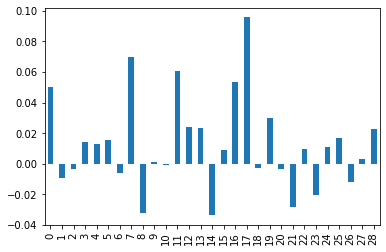

In [23]:
pd.Series( df_pnl ).plot(kind='bar')

In [24]:
len(df_pnl)

29

In [25]:
df_pnl.mean(), df_pnl.std()

(0.012703806879741817, 0.030343904042634512)

In [26]:
import numpy as np

print(f"Sharpe = {np.sqrt(252) * df_pnl.mean() / df_pnl.std()}")

Sharpe = 6.646036118562041


<AxesSubplot:>

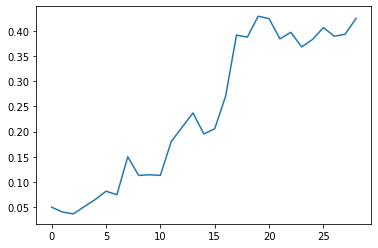

In [27]:
cumret=(np.cumprod(1+df_pnl)-1)
pd.Series(cumret).plot()

<AxesSubplot:>

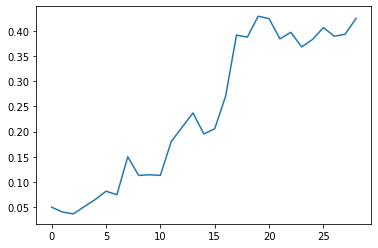

In [28]:
pd.Series(cumret).plot()

- 策略结合SR筹码比例

In [29]:
def get_support_rate(cur_price, date_str):
    fname = f'cn_data_range_vol/period_20/002594/{date_str}.parquet'
    if not os.path.exists(fname):
        # print(fname)
        return 0.0
    df_joint = pl.read_parquet(fname)
    # print(df_joint)


    cur_price = int(cur_price * 100)

    df_above = df_joint.filter(pl.col('range') < cur_price + 20 * 100) \
                        .filter(pl.col('range') > cur_price)
    df_below = df_joint.filter(pl.col('range') > cur_price - 20 * 100) \
                        .filter(pl.col('range') <= cur_price)

    rate = round(df_below['vol'].sum() / (df_below['vol'].sum() + df_above['vol'].sum()), 2)
    # print(rate)
    return rate

In [30]:
def sr_rate(x):
    try:
        date_str = datetime.strftime(x[0] - timedelta(days=1), '%Y-%m-%d')
        entry = x[1]
        if entry is not None and entry > 0.0:
            rate = get_support_rate(entry, date_str)
            return rate
        return 0.0
    except Exception as e:
        print(x)
        return 0.0


sr_rate_list = df[['datetime', 'entry']].apply(lambda x: sr_rate(x))

In [31]:
len(df)

730

In [32]:
df['sr_rate'] = sr_rate_list['apply']

In [33]:
df['sr_rate_valid'] = (df['sr_rate'] > 0.8)

In [46]:
df['trend_sr_valid'] = (df['high_broke_last_priod_LH'] & df['sr_rate_valid'])

In [35]:
# 进仓条件列类型是 Bool, 和Float相乘会只保留 条件为True的行
# 进仓价是前日的 last_valid_LH_pivot_price 指标
df['entry_sr'] = df['last_valid_LH_pivot_price'].shift() * df['trend_sr_valid']

# 以下一天的开盘作为出仓价，注意因为最后一天还不知道第二天的开盘价，这里设定了当日收盘价来计算
df['exit_sr'] = df['open'].shift(-1).fill_null(df['close'][-1])

<AxesSubplot:>

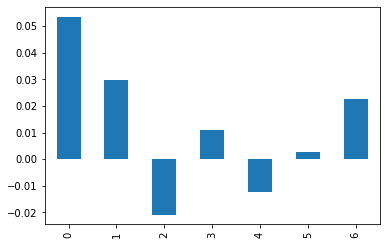

In [36]:
df_pnl = ((df['exit_sr'] - df['entry_sr']) / df['entry_sr'])[ df['trend_sr_valid'] ]
pd.Series( df_pnl ).plot(kind='bar')

Sharpe = 7.715231243643186


<AxesSubplot:>

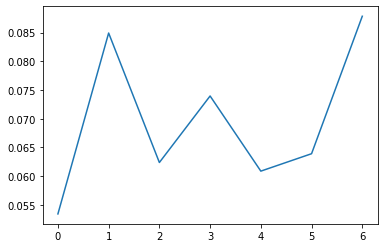

In [37]:
import numpy as np

print(f"Sharpe = {np.sqrt(252) * df_pnl.mean() / df_pnl.std()}")
cumret=(np.cumprod(1+df_pnl)-1)
pd.Series(cumret).plot()

In [38]:
# df = df.drop('sr_rate_list')
df.columns

['open',
 'close',
 'high',
 'low',
 'vol',
 'amount',
 'datetime',
 'is_pivot_low',
 'pivot_low_price',
 'is_pivot_high',
 'pivot_high_price',
 'is_potential_low',
 'is_potential_high',
 'freq',
 'symbol',
 'index',
 'last_valid_LH_pivot_price',
 'valid_LH_length',
 'last_valid_HL_pivot_price',
 'valid_HL_length',
 'high_broke_last_priod_LH',
 'entry',
 'exit',
 'sr_rate',
 'sr_rate_valid',
 'trend_sr_valid',
 'entry_sr',
 'exit_sr']

In [42]:
df = df.drop('exit')
df = df.drop('entry')
df = df.drop('exit_sr')
df = df.drop('entry_sr')

In [45]:
df.head()

open,close,high,low,vol,amount,datetime,is_pivot_low,pivot_low_price,is_pivot_high,pivot_high_price,is_potential_low,is_potential_high,freq,symbol,index,last_valid_LH_pivot_price,valid_LH_length,last_valid_HL_pivot_price,valid_HL_length,high_broke_last_priod_LH,sr_rate,sr_rate_valid
f64,f64,f64,f64,f64,f64,datetime,bool,f64,bool,f64,bool,bool,str,str,i64,f64,i64,f64,i64,bool,f64,bool
47.66,46.92,47.66,46.61,1.0929463e7,5.12929728e8,2020-01-10 00:00:00,false,null,false,null,false,false,"""1d""","""002594""",0,null,0,null,0,false,0.0,false
51.61,51.61,51.61,50.51,5.188276e7,2.6629e9,2020-01-13 00:00:00,false,null,false,null,false,false,"""1d""","""002594""",1,null,0,null,0,false,0.0,false
55.0,53.44,55.99,53.0,6.1497596e7,3.3569e9,2020-01-14 00:00:00,false,null,true,55.99,false,false,"""1d""","""002594""",2,null,0,null,0,false,0.0,false
54.01,53.31,54.75,52.28,2.9870524e7,1.5945e9,2020-01-15 00:00:00,false,null,false,null,true,true,"""1d""","""002594""",3,55.99,1,null,0,false,0.0,false
53.49,54.09,54.54,51.78,3.3573708e7,1.7782e9,2020-01-16 00:00:00,true,51.78,false,null,true,true,"""1d""","""002594""",4,55.99,2,null,0,false,0.0,false


In [47]:
# 导出 Visual 数据文件
df.to_parquet(f'../analyzer.view.server/dump/cn_pivot/compute/{symbol}_with_length_threshold__with_sr.1d.parquet')